# Chapter Two: Training Machine Learning Algorithms for Classification

## Nombres

eta -> parece una n, representa la taza de aprendizaje  
y -> class labels  
__X__ -> Matrix, equis grande  
__x__ -> Vector, equis pequeña  
$x_j^i$ -> Valor individual, equis cursiva  
$x^i$ -> _i_-th row of X  
$x_j$ -> _j_-th dimension of X  
__z__ -> Net Input  

## Perceptron

### Useful resources: 
["Perceptron"](https://youtu.be/4Gac5I64LM4) by [ritvikmath](https://www.youtube.com/channel/UCUcpVoi5KkJmnE3bvEhHR0Q)

In [2]:
import numpy as np

In [21]:
class Perceptron:
    def __init__(self, learning_rate = 0.1, n_iterations = 50):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

        
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.errors = []
        
        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors.append(errors)
        return(self)


    def net_input(self, X):
        return(np.dot(X, self.w_[1:]) + self.w_[0])

    
    def predict(self, X):
        return(np.where(self.net_input(X) >= 0.0, 1, -1))

### Notas

Predict se usa en el entrenar pero también se usa una vez se ha entrenado.  
Se guardan los errores para evaluar el desempeño posteriormente.  
La regla del perceptron no está restringida a 2d.  
Puede usarse __OvA__ para clasificación de multiples clases.

### Dudas

* ¿Por qué + w_0?
    > porque es una manera mas compacta y equivalente a otra cosa,  
    > un equivalente es np.dot(1+X, 1+self.w_[1:]) o algo asi...
* No entiendo porque no añadir 0 como w[0] y 1 como X[0].
    > creo que no afecta en nada pero puede que genere problemas  
    > tambien creo que es dificil de definir
    > o puede que no valga la pena añadir un 1 al inicio si X es muy grande

## Probando el perceptron con el dataset iris.

### Importando el dataset

In [4]:
import pandas as pd

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header = None, encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Obteniendo las etiquetas y cambiando etiquetas de texto a número

In [8]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

### Obteniendo largo de sépalo y pétalo

In [144]:
X = df.iloc[0:100, [0, 1]].values

### Graficando

In [9]:
import matplotlib.pyplot as plt

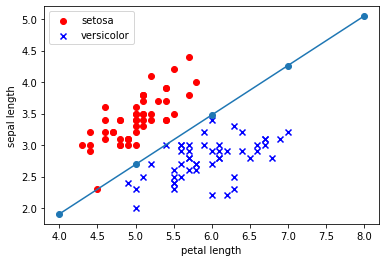

In [150]:
plt.scatter(
    X[:50, 0], 
    X[:50, 1], 
    color = 'red', 
    marker = 'o', 
    label = 'setosa'
)

plt.scatter(
    X[50:100, 0], 
    X[50:100, 1],
    color = 'blue', 
    marker = 'x', 
    label = 'versicolor'
)

plt.xlabel('petal length')
plt.ylabel('sepal length')

plt.legend(loc='upper left')

ws = perceptron.w_
plt.plot(list(range(4,9)), [(-ws[0] -(ws[1]*x))/ws[2] for x in range(4,9)], marker='o')

plt.show()

### Entrenando perceptron

In [148]:
perceptron = Perceptron(learning_rate = 0.1, n_iterations = 750)
perceptron.fit(X, y)

### Graficando

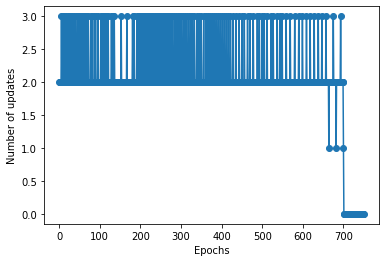

In [149]:
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
ws = perceptron.w_
plt.plot([(-ws[0] -(ws[1]*x))/ws[2] for x in range(7)], marker='o')

### Notas

Los primeros 100 valores son de iris-setosa e iris-versicolor. Son separables linealmente.  
Al ser 2 clases se cambia su nombre por -1 o 1 para __setosa__ y __versicolor__, respectivamente.

Se usan los largos del sépalo y el pétalo, correspondiendo a la columna 0 y 2.  

Parece que el proceso de entrenamiento finaliza a la sexta vuelta, supongo que es un ejercicio facil.

Con el ancho de sépalo y pétalo parece ser mas facil de separar, en el segundo epoch ya ha terminado.
Columnas 1 y 3

Fijandose solo en el largo y ancho del sépalo parece que nunca llega a "terminar", almenos con 0.1 o 0.01 de learning_rate y 10-50 n_iterations.  
!!! Parece que es posible pero con estos valores: learning_rate = 0.00001, n_iterations = 1000  
Parece que apeeeeenas es posible.  
Guarde la imagen con plt.savefig('solo_con_sepalo.png', dpi=300)  
Esto es muy poco practico asi que esperare a ver si hay mejores formas de ajustar el learning_rate y las iteraciones.

A diferencia de lo anterior, fijandose solo en el sépalo, largo y ancho, parece es la manera más facil de separar setosa y versicolor, en 3 rondas ya ha terminado, con los valores: learning_rate = 0.1, n_iterations = 10  

Con ancho de sepalo y largo de petalo parece ser facil de separar, 4 vueltas, l_r de 0.1 y 10 i

Dejare el ejemplo standar.

### Nota importante

Parece que usando otras combinaciones de 2 columnas tambien es posible separar linealmente setosa de versicolor, tal vez ejecute varias veces la notebook para obtener imagenes de los graficos o puede que cree algo para obtener todas esas versiones.  

Falta probar con mas dimensiones.

## Preguntas a responder

### ¿Cómo se asemeja el aprendizaje de un perceptrón al de una neurona?

#### Input  

Neurona -> Electricos y Quimicos  
Perceptrón -> Datos  

#### Activación

Neurona -> Impulso suficientemente fuerte para pasar por el axón  
Perceptrón -> Valor superior a un cierto limite  

#### Aprendizaje  

Neurona -> La conexión entre neuronas se fortalece entre más se use  
Perceptrón -> Los valores se ajustan para mejorar la clasificación  

### ¿Qué hace un algoritmo de clasificación?

Predice la clase de algo en base a lo que ha aprendido, a

### ¿Cuál es la diferencia entre el perceptrón y Adaline?



### ¿Cómo funciona el método de la gradiente?

Busca el minimo de 

### ¿Cuándo utilizar gradiente estocástica?

